In [13]:
import numpy as np
import pandas as pd 
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [4]:
with gzip.open("../00.data/preprocesado/meneame_procesado.pkl.gz", "rb") as f:
    df = pickle.load(f)

In [9]:
df = df[['meneos', 'clicks', 'karma', 'positive_votes', 'negative_votes', 'anonymous_votes', 'comments']]

Elbow  method : definir cuantos clusters necesitamos

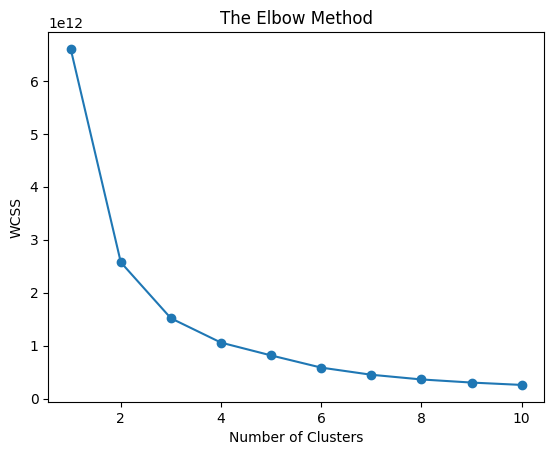

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



De este grafo mostrando within-cluster sum of squares por numero de clusters, elbow e ve aproximadamente en n_cluster = 3 o 4. Asi que ahora vamos a hacer KMeans con n=3 y con n=4

In [16]:
kmeans_3 = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=42)
labels_3 = kmeans_3.fit_predict(df)  # Predict clusters

kmeans_4 = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=42)
labels_4 = kmeans_4.fit_predict(df) 

Ahora haciendo silhouette score para ver cual de los dos esta mejor (n=3 o n=4)

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for both cases
silhouette_3 = silhouette_score(df, labels_3)
silhouette_4 = silhouette_score(df, labels_4)

print(f"Silhouette Score for 3 Clusters: {silhouette_3:.3f}")
print(f"Silhouette Score for 4 Clusters: {silhouette_4:.3f}")

In [ ]:
#elejir silhouette score que esta mas alta y eso seria numero de clusters
#hacer PCA para poder visualizar data en 2D porque no se puede hacerlo con 7 dimensiones
#hacer DBSCAN?